# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [35]:
#  1. Get the total rides for each city type
total_rides_by_type = pyber_data_df.groupby('type').size()
total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
dtype: int64

In [36]:
# 2. Get the total drivers for each city type
# The original city_data_df DataFrame is used to avoid the headache of dropping duplicate city rows.
total_drivers_by_type = city_data_df.groupby('type')['driver_count'].sum()
total_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [37]:
#  3. Get the total amount of fares for each city type
total_fares_by_type = pyber_data_df.groupby('type')['fare'].sum()
total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [38]:
#  4. Get the average fare per ride for each city type.
#  This rounds dollars at the hundredths place as fractions of a cent are meaningless.
#  Instructions ask to divide sum by total rides but the same is achieved by the pandas.DataFrame.mean function.
#  The long way is this: (pyber_data_df.groupby('type')['fare'].sum() / pyber_data_df.groupby('type').size()).round(2)
average_fare_by_type = pyber_data_df.groupby('type')['fare'].mean().round(2)
average_fare_by_type

type
Rural       34.62
Suburban    30.97
Urban       24.53
Name: fare, dtype: float64

In [40]:
#  5. Get the average fare per driver for each city type. 
#  This rounds dollars at the hundredths place as fractions of a cent are meaningless.
#  pandas.DataFrame.mean is not employed here because we are dividing by a grouped column sum, not a grouped column count.
average_fare_per_driver_by_type = (total_fares_by_type / total_drivers_by_type).round(2)
average_fare_per_driver_by_type

type
Rural       55.49
Suburban    39.50
Urban       16.57
dtype: float64

In [41]:
#  6. Create a PyBer summary DataFrame. 
#  A dictionary of pandas Series is created first for code readability, then converted to a DataFrame.
pyber_summary_dict = {
    'Total Rides': total_rides_by_type,
    'Total Drivers': total_drivers_by_type,
    'Total Fares': total_fares_by_type,
    'Average Fare per Ride': average_fare_by_type,
    'Average Fare per Driver': average_fare_per_driver_by_type
}
pyber_summary_df = pd.DataFrame(pyber_summary_dict)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.62,55.49
Suburban,625,490,19356.33,30.97,39.50
Urban,1625,2405,39854.38,24.53,16.57


In [26]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [47]:
#  8. Format the columns.
pyber_summary_df.style.format({
    'Total Rides': '{:,.0f}',
    'Total Drivers': '{:,.0f}',
    'Total Fares': '${:,.2f}',
    'Average Fare per Ride': '${:,.2f}',
    'Average Fare per Driver': '${:,.2f}'
})

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [48]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [73]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
# Convert 'date' column to datetime dtype
pyber_data_df['date'] = pd.to_datetime(pyber_data_df['date'])

# groupby requested indices
# The following line groups by date, which is seemingly indicated by the module at this point. However, later on,
# the constraint of a groupby date seems to not be necessary. Thus, the Grouper function is not employed in my output.
# df = pyber_data_df.groupby([pd.Grouper(key='date', axis=0, freq='D'), 'type'])['fare'].sum()

df = pyber_data_df.groupby(['date', 'type'])['fare'].sum()
df

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [74]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df = df.reset_index()
df

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [86]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
######
# A caveat: In the module, the sample output shows the pivot table without a sum aggreate function on each date.
# I have thus followed the module's directions rather than its output, which clearly states 
piv_df = df.pivot(index='date',columns='type')['fare']
piv_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [100]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
# set date range as array of booleans telling us which dates to keep
date_range = (piv_df.index >= '2019-01-01') & (piv_df.index <= '2019-04-29')
# create new df
new_df = piv_df.loc[date_range]
new_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [92]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
# Already accomplished.
type(new_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [93]:
# 7. Check that the datatype for the index is datetime using df.info()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [108]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
# This creates bins based on every 7th day starting 2019-01-01 which was a Tuesday. The weekly bins are thus Tues thru the next Mon.
resampled_df = new_df.resample('W').sum()
resampled_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


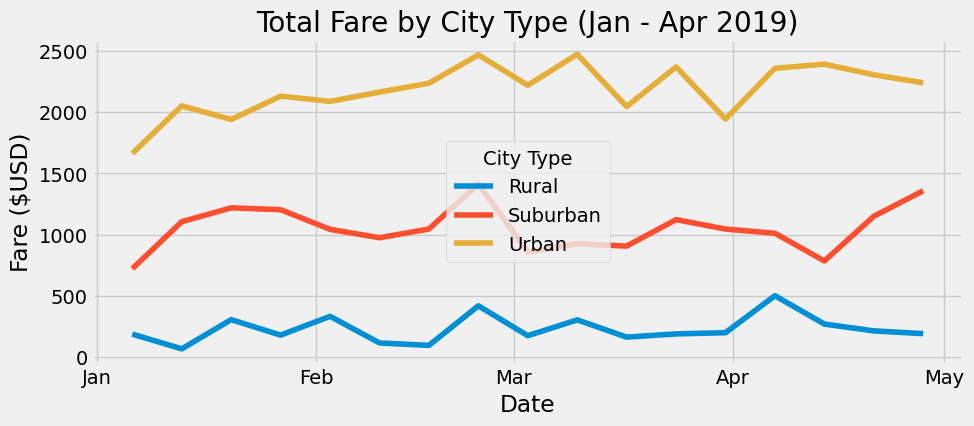

In [160]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function.

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Import date formatters for x-axis (full yyyy-mm-dd is really ugly!)
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Initialize plot with readable dimensions
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(resampled_df)

# Add axis labels and title
ax.set(
    xlabel='Date',
    ylabel='Fare ($USD)',
    title='Total Fare by City Type (Jan - Apr 2019)'
)

# Add legend
ax.legend(resampled_df.columns, title='City Type', loc='center')

# Define the date format
ax.xaxis.set_major_formatter(DateFormatter('%b'))
# Set ticks to once a month as in sample output
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Save figure in the ./analysis folder
plt.savefig('./analysis/PyBer_fare_summary.png')
